In [1]:
# HCASE Embedding
#
# Author: Gergely Zahoranszky-Kohalmi, PhD
#
# Email: gergely.zahoranszky-kohalmi@nih.gov
#
# Organization: National Center for Advancing Translational Sciences (NCATS/NIH)
#


In [2]:
import hcase
import pandas as pd
from rdkit.rdBase import BlockLogs

In [3]:
# Config section



fname_reference_scaffolds = '../../data/scaffolds_chembl_24.tab'
fname_structures = '../../data/STD_drugbank_approved_structures_v5.txt'

fname_out_space = '../../data/hc_space.tab'
fname_out_embedding = '../../data/drugs_emb_hcase_chembl.tab'

n_dim = 2



use_precomputed_reference_spaces = True

do_downsampling = False
rnd_seed = 55555
sample_size = 200



In [4]:
# Import datasets

df_ref_scaffolds = pd.read_csv (fname_reference_scaffolds, sep = '\t')
df_structures = pd.read_csv (fname_structures, sep = '\t')



In [5]:
# Clean-up datasets

df_structures = df_structures.rename (columns = {'Structure': 'structure', 'ID': 'id'})

In [6]:
# Reduce datasets for workflow development (optional)

if do_downsampling:

    df_ref_scaffolds = df_ref_scaffolds.sample (n = sample_size, random_state = rnd_seed)
    df_structures = df_structures.sample (n = sample_size, random_state = rnd_seed)



In [7]:
df_structures

,structure,id,MOLLIBRARY,MOLLIBRARY_INT,MOLLIBRARY_INT_StdDev,logS,logS_StdDev,logS @ pH7.4,logS @ pH7.4_StdDev,logP,...,HBD,HBD_StdDev,HBA,HBA_StdDev,TPSA,TPSA_StdDev,Flexibility,Flexibility_StdDev,Rotatable Bonds,Rotatable Bonds_StdDev
0,CCC(C)C(NC(=O)C(CCC(O)=O)NC(=O)C(CCC(O)=O)NC(=...,DB00006,DrugBank Approved 5.0.9,4,0,4.70300,1.0330,7.133,inf,-3.2590,...,28.0,0.0,57.0,0.0,901.6,0.0,0.53750,0.0,86.0,0.0
1,CC(C)CC(NC(=O)C(COC(C)(C)C)NC(=O)C(CC1=CC=C(O)...,DB00014,DrugBank Approved 5.0.9,4,0,2.74900,1.0330,4.191,inf,-0.3370,...,17.0,0.0,32.0,0.0,495.9,0.0,0.44790,0.0,43.0,0.0
2,NC(=N)NCCCC(NC(=O)C1CCCN1C(=O)C2CSSCCC(=O)NC(C...,DB00035,DrugBank Approved 5.0.9,4,0,3.09600,1.0330,3.664,inf,-0.7056,...,14.0,0.0,26.0,0.0,435.4,0.0,0.29870,0.0,23.0,0.0
3,CC(C)CC(NC(=O)C(CCCNC(N)=O)NC(=O)C(CC1=CC=C(O)...,DB00050,DrugBank Approved 5.0.9,4,0,2.04400,1.0330,3.420,inf,0.5322,...,17.0,0.0,31.0,0.0,495.7,0.0,0.46730,0.0,50.0,0.0
4,CCCCCCCCCC(=O)NC(CC1=C[NH]C2=C1C=CC=C2)C(=O)NC...,DB00080,DrugBank Approved 5.0.9,4,0,3.56100,1.0330,5.656,inf,-1.5120,...,22.0,0.0,43.0,0.0,702.0,0.0,0.33050,0.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,OC1C(O)C(OC2C(O)C(O)C(OP)OC2C(O)=O)OC(C1P)C(O)=O,DB13518,DrugBank Approved 5.0.9,4,0,5.19400,1.0330,5.513,inf,-1.8470,...,6.0,0.0,12.0,0.0,192.4,0.0,0.18520,0.0,5.0,0.0
2066,CN1C(=O)C(O)N=C(C2=CC=CC=C2Cl)C3=C1C=CC(=C3)Cl,DB13872,DrugBank Approved 5.0.9,4,0,2.27700,1.0330,2.277,1.033,2.5460,...,1.0,0.0,4.0,0.0,52.9,0.0,0.04167,0.0,1.0,0.0
2067,CC(C)(OC1=CC=C(C=C1)C(=O)C2=CC=C(Cl)C=C2)C(O)=O,DB13873,DrugBank Approved 5.0.9,4,0,1.36900,0.7036,3.317,0.621,3.6550,...,1.0,0.0,4.0,0.0,63.6,0.0,0.21740,0.0,5.0,0.0
2068,CC(C)(O)CNC1=NC(=NC(=N1)NC2=CC(=NC=C2)C(F)(F)F...,DB13874,DrugBank Approved 5.0.9,4,0,0.27490,1.0330,1.165,0.621,3.5020,...,3.0,0.0,8.0,0.0,108.7,0.0,0.22860,0.0,8.0,0.0


In [8]:
# Create ChEMBL Scaffold space
with BlockLogs():
    if not use_precomputed_reference_spaces:
        
        df_hcase_space = hcase.train (df_ref_scaffolds)
        df_hcase_space.to_csv (fname_out_space, sep = '\t', index = False)
    
    else:
        
        df_hcase_space = pd.read_csv (fname_out_space, sep = '\t')


In [9]:

# Embed structures into HCASE space
with BlockLogs():
    %time df_embedded = hcase.embed (df_hcase_space, df_structures, n_dim)

/opt/homebrew/Caskroom/miniforge/base/envs/hcase_examples/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
100%|██████████| 1/1 [00:00<00:00, 7463.17it/s]
/opt/homebrew/Caskroom/miniforge/base/envs/hcase_examples/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
100%|██████████| 1/1 [00:00<00:00, 10727.12it/s]
/opt/homebrew/Caskroom/miniforge/base/envs/hcase_examples/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
100%|██████████| 1/1 [00:00<00:00, 8256.50it/s]
/opt/homebrew/Caskroom/mini

CPU times: user 102 ms, sys: 122 ms, total: 224 ms
Wall time: 13min 59s


In [10]:
df_embedded.to_csv (fname_out_embedding, sep = '\t')

In [11]:
df_embedded

,id,structure,bms,sk_struct,idx,closest_order,bucket_id,embedded_hs_coordinates,Dim_1,Dim_2,hc_order
0,DB00006,CCC(C)C(NC(=O)C(CCC(O)=O)NC(=O)C(CCC(O)=O)NC(=...,O=C(CNC(=O)CNC(=O)C1CCCN1C(=O)CNC(=O)CNC(=O)CN...,85 52 57 6 0 6 3 0 24 0 0 0 24 36 0 0 18 18 3 ...,1,55542,16,3;0,3,0,2
1,DB00014,CC(C)CC(NC(=O)C(COC(C)(C)C)NC(=O)C(CC1=CC=C(O)...,O=C(CNC(=O)CNC(=O)C(Cc1ccccc1)NC(=O)CNC(=O)C(C...,55 25 29 6 0 6 4 0 14 0 0 0 14 21 0 0 9 12 9 0...,2,55273,16,3;0,3,0,2
2,DB00035,NC(=N)NCCCC(NC(=O)C1CCCN1C(=O)C2CSSCCC(=O)NC(C...,O=C1CNC(=O)C(Cc2ccccc2)NC(=O)C(Cc2ccccc2)NC(=O...,40 3 6 4 0 20 2 0 10 0 2 0 8 14 0 2 6 6 0 1 0 ...,3,54354,16,3;0,3,0,2
3,DB00050,CC(C)CC(NC(=O)C(CCCNC(N)=O)NC(=O)C(CC1=CC=C(O)...,O=C(CNC(=O)CNC(=O)C(Cc1ccccc1)NC(=O)CNC(=O)C(C...,60 27 31 6 0 6 5 0 11 0 0 0 11 17 0 0 8 9 9 0 ...,4,55371,16,3;0,3,0,2
4,DB00080,CCCCCCCCCC(=O)NC(CC1=C[NH]C2=C1C=CC=C2)C(=O)NC...,O=C(CCc1c[nH]c2ccccc12)NCC(=O)NCC(=O)NC1COC(=O...,58 12 14 4 0 31 3 0 14 0 0 1 13 28 0 0 15 13 0...,5,55324,16,3;0,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
10348,DB13518,OC1C(O)C(OC2C(O)C(O)C(OP)OC2C(O)=O)OC(C1P)C(O)=O,C1CCC(OC2CCCOC2)OC1,13 1 2 2 0 6 0 0 3 0 0 3 0 3 0 0 3 0 0 0 0 1 1...,1475,3101,3102,58;29,58,29,8
10349,DB13872,CN1C(=O)C(O)N=C(C2=CC=CC=C2Cl)C3=C1C=CC(=C3)Cl,O=C1CN=C(c2ccccc2)c2ccccc2N1,17 0 0 3 0 7 2 2 2 0 0 0 2 3 0 0 1 2 0 0 0 0 1...,1476,10595,10596,125;100,125,100,8
10350,DB13873,CC(C)(OC1=CC=C(C=C1)C(=O)C2=CC=C(Cl)C=C2)C(O)=O,O=C(c1ccccc1)c1ccccc1,13 1 2 2 0 6 2 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0...,1477,3127,3128,61;26,61,26,8
10351,DB13874,CC(C)(O)CNC1=NC(=NC(=N1)NC2=CC(=NC=C2)C(F)(F)F...,c1ccc(-c2ncnc(Nc3ccncc3)n2)nc1,19 1 2 3 0 6 3 0 6 0 0 0 6 6 0 0 0 6 0 0 0 5 2...,1478,17333,17334,20;131,20,131,8


<Axes: xlabel='Dim_1', ylabel='Dim_2'>

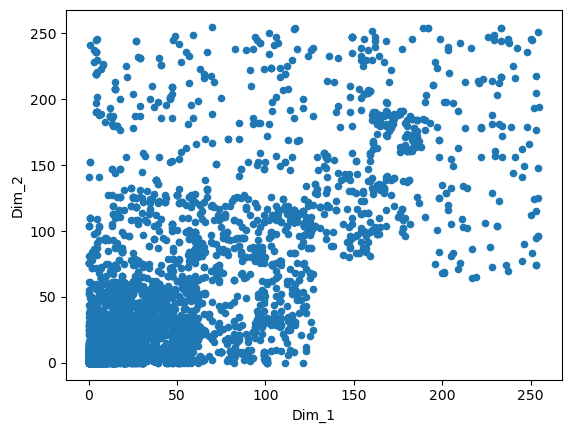

In [12]:
df_embedded.plot.scatter(x='Dim_1', y='Dim_2')